In [1]:

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [2]:
import arcgis
from arcgis.gis import GIS
from arcgis import geometry
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.features import FeatureLayerCollection
import pandas as pd
gis = GIS()

/home/xij080/.local/lib/python3.7/site-packages/arcgis/features/_data/geodataset/utils.py:16: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime,


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
sd_dashboard_service = 'https://services1.arcgis.com/1vIhDJwtG5eNmiqX/ArcGIS/rest/services/CovidDashUpdate/FeatureServer'
db_item = FeatureLayerCollection(sd_dashboard_service)
 
ZipsCompiled_df = pd.DataFrame.spatial.from_layer(db_item.layers[0])
ConfirmHopsitalICuDeaths_df = pd.DataFrame.spatial.from_layer(db_item.layers[1])
AgeGenderPoints_df = pd.DataFrame.spatial.from_layer(db_item.layers[2])
CompiledCopyDashUpdate_df = pd.DataFrame.spatial.from_layer(db_item.layers[3])

/home/xij080/.local/lib/python3.7/site-packages/arcgis/features/layer.py:1853: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  "esriFieldTypeDate" : pd.datetime,


In [5]:

risk = pd.read_csv('exposure_risk.csv')

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [7]:
#start building models
risk = risk.rename(columns = {'ZIP':'ZipText'})
risk = risk.drop(['SHAPE'], axis = 1)
risk.head()

,Unnamed: 0,HaveInsur,Noinsurance,Laborforce,PubTrans,BusinOccu,ServiceOccu,SalesOccu,ConstructionOcc,TranspOccu,H<10k,H<14k,HwithEarn,HwithSSN,HwithRetire,HwithSupple,HwithAssist,ZipText
0,0,7.0,62.1,1.3,9.2,41.4,16.7,23.7,10.9,7.3,3.5,2.4,77.5,31.6,24.1,6.4,1.3,91901
1,1,11.4,62.2,1.1,5.8,43.0,17.3,24.7,6.2,8.8,5.7,1.5,77.2,37.7,32.9,4.5,1.8,91902
2,2,10.2,10.6,0.0,24.2,14.9,14.0,19.8,47.9,3.3,17.2,10.3,15.9,66.7,36.6,0.2,0.2,91905
3,3,9.8,50.9,0.0,10.4,26.2,23.0,22.8,21.2,6.7,5.7,2.7,74.9,35.3,18.7,13.4,1.6,91906
4,4,10.7,61.5,4.8,3.9,31.6,21.3,26.8,10.1,10.2,6.3,5.7,78.4,30.0,21.6,7.8,2.9,91910


In [8]:
ZipsCompiled_df.head()
df = ZipsCompiled_df[['UpdateDate','Case_Count','ZipText']]
df['UpdateDate'] = pd.to_datetime(df.UpdateDate)
df['UpdateDate'] = df['UpdateDate'].dt.strftime('%m/%d/%Y')
df['ZipText'] = df['ZipText'].astype(int)
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,UpdateDate,Case_Count,ZipText
0,04/01/2020,1.0,91901
1,04/01/2020,9.0,91902
2,04/01/2020,23.0,91910
3,04/01/2020,21.0,91911
4,04/01/2020,20.0,91913


In [9]:
#merge the important information to the confirmed cases with datetime dataframe
model_data = pd.merge(df, risk, how = 'left',on = 'ZipText')
#pd.concat(df,risk)

In [10]:
model_data.head()

,UpdateDate,Case_Count,ZipText,Unnamed: 0,HaveInsur,Noinsurance,Laborforce,PubTrans,BusinOccu,ServiceOccu,SalesOccu,ConstructionOcc,TranspOccu,H<10k,H<14k,HwithEarn,HwithSSN,HwithRetire,HwithSupple,HwithAssist
0,04/01/2020,1.0,91901,0,7.0,62.1,1.3,9.2,41.4,16.7,23.7,10.9,7.3,3.5,2.4,77.5,31.6,24.1,6.4,1.3
1,04/01/2020,9.0,91902,1,11.4,62.2,1.1,5.8,43.0,17.3,24.7,6.2,8.8,5.7,1.5,77.2,37.7,32.9,4.5,1.8
2,04/01/2020,23.0,91910,4,10.7,61.5,4.8,3.9,31.6,21.3,26.8,10.1,10.2,6.3,5.7,78.4,30.0,21.6,7.8,2.9
3,04/01/2020,21.0,91911,5,14.0,63.4,5.1,3.5,24.8,22.5,27.3,12.2,13.1,4.6,7.1,79.9,28.8,20.3,6.5,3.2
4,04/01/2020,20.0,91913,6,7.5,68.3,1.2,6.6,46.7,17.1,24.6,2.4,9.2,4.1,2.1,90.1,17.4,16.4,3.4,1.7


In [11]:
#seperate zipcode --> model will predict a seperate zipcode
model_data['ZipText'].unique()

array([91901, 91902, 91910, 91911, 91913, 91914, 91915, 91916, 91932,
       91935, 91941, 91942, 91945, 91950, 91977, 91978, 92004, 92007,
       92008, 92009, 92010, 92011, 92014, 92019, 92020, 92021, 92024,
       92025, 92026, 92027, 92028, 92029, 92037, 92040, 92054, 92056,
       92057, 92058, 92061, 92064, 92065, 92066, 92067, 92069, 92071,
       92075, 92078, 92081, 92082, 92083, 92084, 92091, 92093, 92101,
       92102, 92103, 92104, 92105, 92106, 92107, 92108, 92109, 92110,
       92111, 92113, 92114, 92115, 92116, 92117, 92118, 92119, 92120,
       92121, 92122, 92123, 92124, 92126, 92127, 92128, 92129, 92130,
       92131, 92139, 92145, 92154, 92161, 92173, 92136, 91905, 91906,
       91917, 91931, 91934, 91948, 91962, 91963, 91980, 92003, 92036,
       92055, 92059, 92060, 92070, 92086, 92096, 92134, 92135, 92140,
       92155, 92182, 92259, 92536, 92672])

In [12]:
model_data['ZipText'].nunique()

113

In [13]:
total = model_data.groupby('UpdateDate').sum()

In [ ]:
#separate

In [24]:
group1 = model_data[model_data['ZipText']==91901]

In [25]:
group2 = model_data[model_data['ZipText']==91902]

In [26]:
group3 = model_data[model_data['ZipText']==91910]

In [27]:
group4 = model_data[model_data['ZipText']==91911]

In [28]:
group5 = model_data[model_data['ZipText']==91913]

In [29]:
group5 = model_data[model_data['ZipText']==91914]

In [ ]:
#dictionary for the prediction data after 20 days first is max second is min


In [17]:
total.head()

,Case_Count,ZipText,Unnamed: 0,HaveInsur,Noinsurance,Laborforce,PubTrans,BusinOccu,ServiceOccu,SalesOccu,ConstructionOcc,TranspOccu,H<10k,H<14k,HwithEarn,HwithSSN,HwithRetire,HwithSupple,HwithAssist
UpdateDate,,,,,,,,,,,,,,,,,,,
03/30/2020,872.0,8193312,5571,825.9,5744.2,234.7,682.4,3789.4,1633.2,2006.0,665.2,706.2,439.2,298.0,7175.4,2205.6,1532.1,391.0,210.5
03/31/2020,996.0,8469340,5714,847.9,5869.1,239.2,693.5,3864.5,1668.0,2054.1,687.4,725.8,448.0,308.1,7334.4,2260.7,1576.6,402.5,216.8
04/01/2020,1163.0,8929309,5885,884.2,6139.9,240.8,733.7,4024.0,1766.0,2181.0,759.8,768.9,471.3,341.8,7675.7,2462.5,1722.6,426.8,233.7
04/02/2020,1261.0,9021445,5996,884.2,6139.9,240.8,733.7,4024.0,1766.0,2181.0,759.8,768.9,471.3,341.8,7675.7,2462.5,1722.6,426.8,233.7
04/03/2020,1330.0,9021445,5996,884.2,6139.9,240.8,733.7,4024.0,1766.0,2181.0,759.8,768.9,471.3,341.8,7675.7,2462.5,1722.6,426.8,233.7


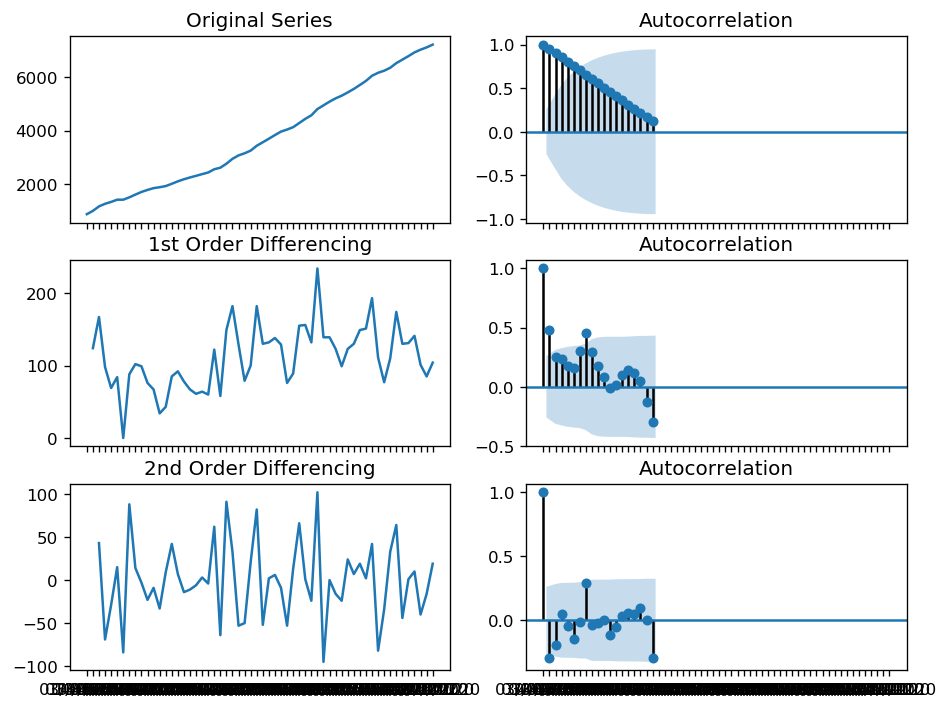

In [18]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(total.Case_Count); axes[0, 0].set_title('Original Series')
plot_acf(total.Case_Count, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(total.Case_Count.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(total.Case_Count.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(total.Case_Count.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(total.Case_Count.diff().diff().dropna(), ax=axes[2, 1])

plt.show()
#d = 1

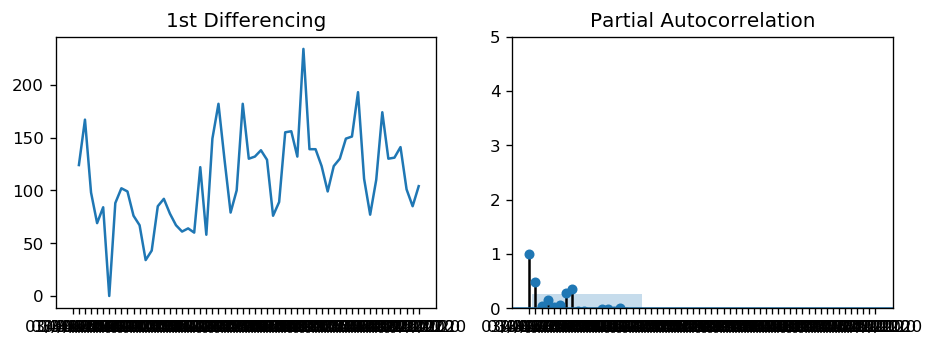

In [19]:
#AR or not
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(total.Case_Count.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(total.Case_Count.diff().dropna(), ax=axes[1])

plt.show()
#p = 2

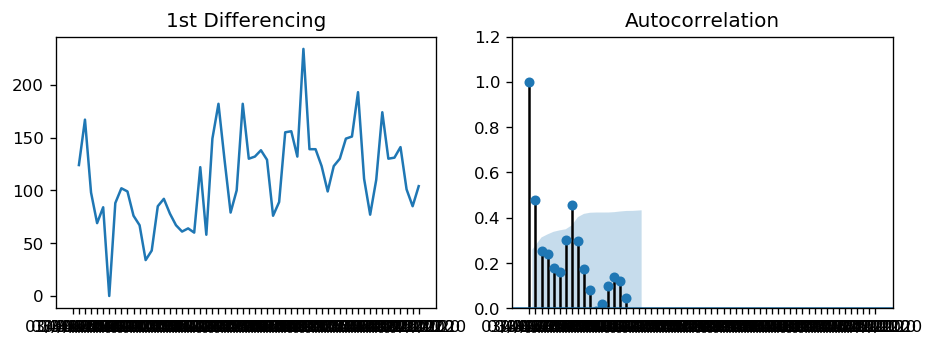

In [20]:
#MA term? 
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/austa.csv')

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(total.Case_Count.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(total.Case_Count.diff().dropna(), ax=axes[1])

plt.show()
#q = 3

In [21]:
#building model
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model_final = ARIMA(total.Case_Count, order=(1,2,3))
model_fit_total = model_final.fit(disp=0)
print(model_fit_total.summary())

/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D2.Case_Count   No. Observations:                   56
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -281.776
Method:                       css-mle   S.D. of innovations             35.519
Date:                Thu, 28 May 2020   AIC                            575.552
Time:                        12:56:46   BIC                            587.704
Sample:                    04-01-2020   HQIC                           580.264
                         - 05-26-2020                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.0697      0.390      2.741      0.006       0.305       1.835
ar.L1.D2.Case_Count    -0.9204      0.083    -11.152      0.000      -1.082      -0.759
ma.L1.D2.Case_Co

/home/xij080/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


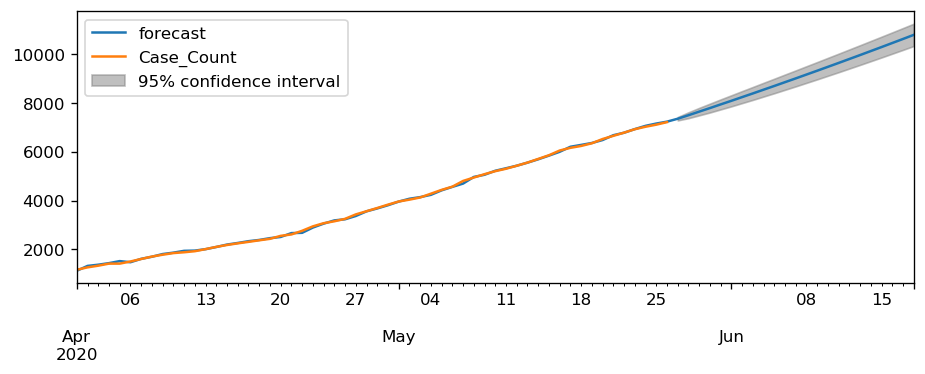

In [22]:
model_fit_total.plot_predict(2,80)
#dynamic=False
plt.show()

In [89]:
total1 = total[32:]
total1.head()

,Case_Count,ZipText,Unnamed: 0,HaveInsur,Noinsurance,Laborforce,PubTrans,BusinOccu,ServiceOccu,SalesOccu,ConstructionOcc,TranspOccu,H<10k,H<14k,HwithEarn,HwithSSN,HwithRetire,HwithSupple,HwithAssist
UpdateDate,,,,,,,,,,,,,,,,,,,
05/01/2020,3960.0,11323569,7503,1100.0,7504.0,265.1,1265.8,4731.9,2145.2,2654.0,1150.8,917.7,660.4,458.3,9004.3,3189.2,2095.9,466.8,279.7
05/02/2020,4036.0,11323569,7503,1100.0,7504.0,265.1,1265.8,4731.9,2145.2,2654.0,1150.8,917.7,660.4,458.3,9004.3,3189.2,2095.9,466.8,279.7
05/03/2020,4125.0,11323569,7503,1100.0,7504.0,265.1,1265.8,4731.9,2145.2,2654.0,1150.8,917.7,660.4,458.3,9004.3,3189.2,2095.9,466.8,279.7
05/04/2020,4280.0,11323569,7503,1100.0,7504.0,265.1,1265.8,4731.9,2145.2,2654.0,1150.8,917.7,660.4,458.3,9004.3,3189.2,2095.9,466.8,279.7
05/05/2020,4436.0,11323569,7503,1100.0,7504.0,265.1,1265.8,4731.9,2145.2,2654.0,1150.8,917.7,660.4,458.3,9004.3,3189.2,2095.9,466.8,279.7


In [91]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model_final = ARIMA(total1.Case_Count, order=(2,2,3))
model_fit_total = model_final.fit(disp=0)
print(model_fit_total.summary())

/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D2.Case_Count   No. Observations:                   24
Model:                 ARIMA(2, 2, 3)   Log Likelihood                -120.391
Method:                       css-mle   S.D. of innovations             32.452
Date:                Thu, 28 May 2020   AIC                            254.781
Time:                        14:05:14   BIC                            263.028
Sample:                    05-03-2020   HQIC                           256.969
                         - 05-26-2020                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.9245      1.022     -0.905      0.365      -2.927       1.078
ar.L1.D2.Case_Count    -0.8639      0.169     -5.121      0.000      -1.195      -0.533
ar.L2.D2.Case_Co

/home/xij080/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/home/xij080/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/xij080/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/xij080/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


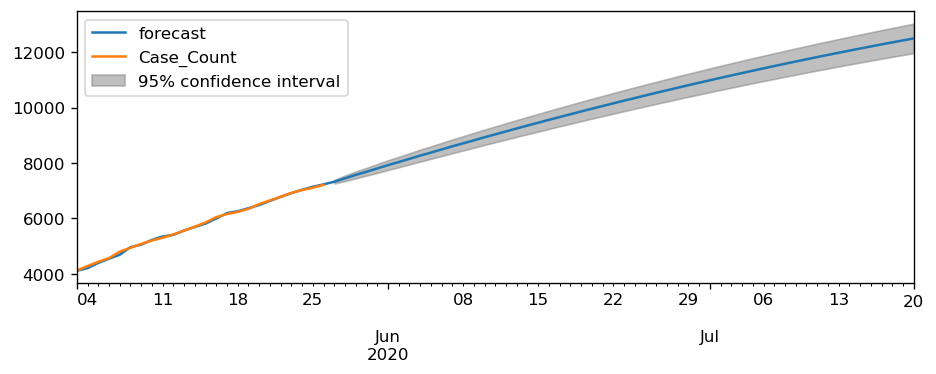

In [92]:
model_fit_total.plot_predict(2,80)
#dynamic=False
plt.show()

In [ ]:
# --> using differetndate to make different model --> use different starting points  --> like start in 5
# give ghierh weight to poit that closer in time

In [31]:
# model will use the risk number and the time to predict the confirmed cases in a zipcode
#91901
group1.head()

,UpdateDate,Case_Count,ZipText,Unnamed: 0,HaveInsur,Noinsurance,Laborforce,PubTrans,BusinOccu,ServiceOccu,SalesOccu,ConstructionOcc,TranspOccu,H<10k,H<14k,HwithEarn,HwithSSN,HwithRetire,HwithSupple,HwithAssist
0,04/01/2020,1.0,91901,0,7.0,62.1,1.3,9.2,41.4,16.7,23.7,10.9,7.3,3.5,2.4,77.5,31.6,24.1,6.4,1.3
97,04/02/2020,1.0,91901,0,7.0,62.1,1.3,9.2,41.4,16.7,23.7,10.9,7.3,3.5,2.4,77.5,31.6,24.1,6.4,1.3
195,04/03/2020,1.0,91901,0,7.0,62.1,1.3,9.2,41.4,16.7,23.7,10.9,7.3,3.5,2.4,77.5,31.6,24.1,6.4,1.3
293,04/04/2020,1.0,91901,0,7.0,62.1,1.3,9.2,41.4,16.7,23.7,10.9,7.3,3.5,2.4,77.5,31.6,24.1,6.4,1.3
572,04/05/2020,1.0,91901,0,7.0,62.1,1.3,9.2,41.4,16.7,23.7,10.9,7.3,3.5,2.4,77.5,31.6,24.1,6.4,1.3


In [42]:
df1 = group1[['UpdateDate','Case_Count']]
df1.set_index(['UpdateDate'], inplace = True)
df1.head()

,Case_Count
UpdateDate,
04/01/2020,1.0
04/02/2020,1.0
04/03/2020,1.0
04/04/2020,1.0
04/05/2020,1.0


In [43]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Case_Count'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

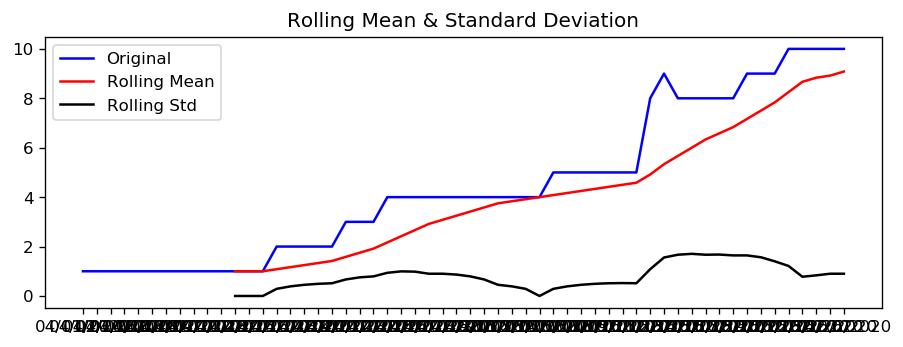

ADF Statistic: 0.51354622417496
p-value: 0.9852790590532944
Critical Values:
	1%: -3.560242358792829
	5%: -2.9178502070837
	10%: -2.5967964150943397


In [44]:
get_stationarity(df1)


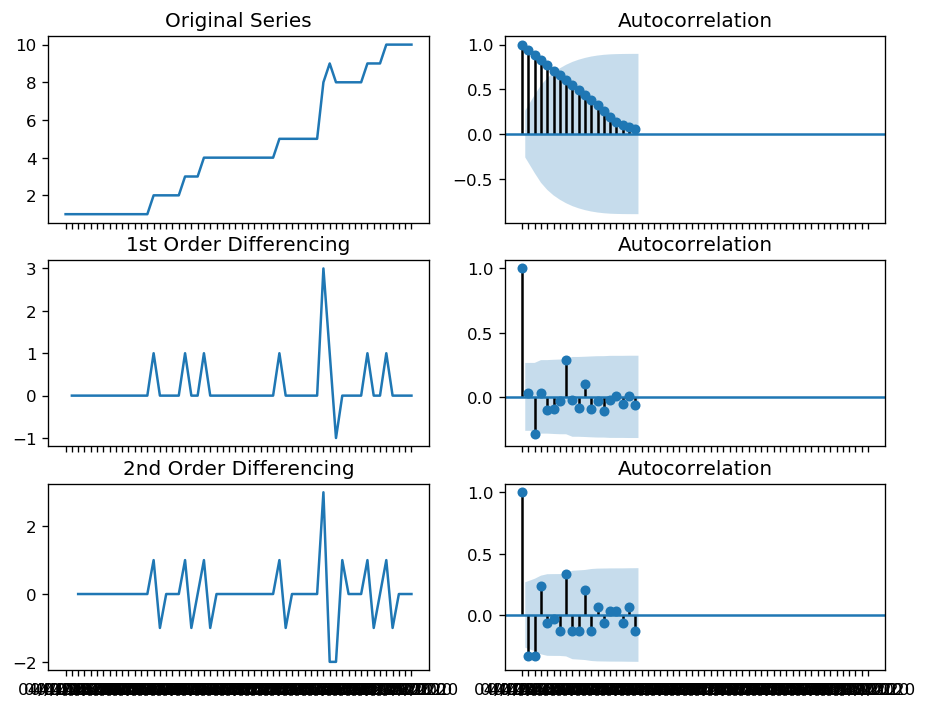

In [45]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df1.Case_Count); axes[0, 0].set_title('Original Series')
plot_acf(df1.Case_Count, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df1.Case_Count.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1.Case_Count.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df1.Case_Count.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df1.Case_Count.diff().diff().dropna(), ax=axes[2, 1])

plt.show()
#d = 1

In [46]:
from pmdarima.arima.utils import ndiffs
y = df1.Case_Count

# Adf Test
ndiffs(y, test='adf')  # 1

# KPSS test
ndiffs(y, test='kpss')  # 1

# PP test:
ndiffs(y, test='pp')  # 1

1

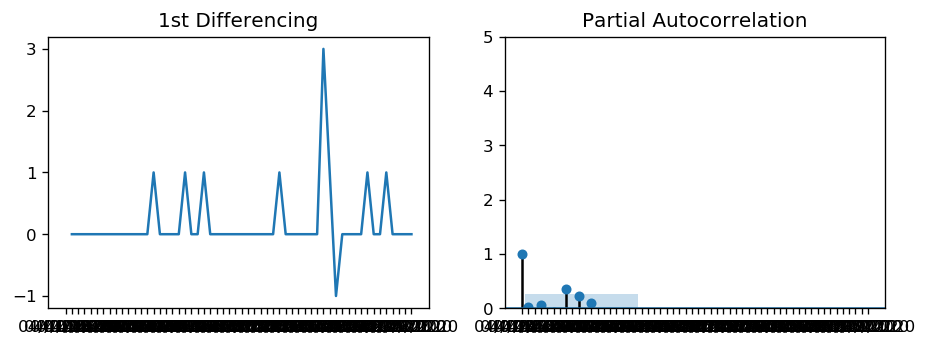

In [47]:
#AR or not
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df1.Case_Count.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df1.Case_Count.diff().dropna(), ax=axes[1])

plt.show()
#p = 1

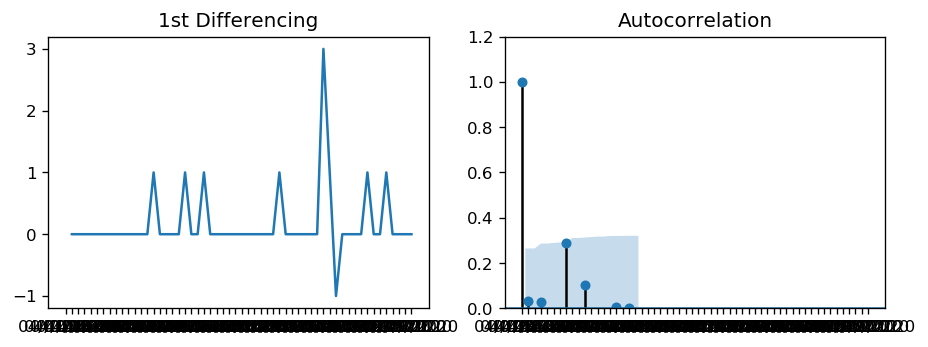

In [48]:
#MA term? 
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/austa.csv')

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df1.Case_Count.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df1.Case_Count.diff().dropna(), ax=axes[1])

plt.show()
#q = 1

In [49]:
#building model
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df1.Case_Count, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Case_Count   No. Observations:                   55
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -40.850
Method:                       css-mle   S.D. of innovations              0.499
Date:                Thu, 28 May 2020   AIC                             89.700
Time:                        13:03:00   BIC                             97.729
Sample:                    04-02-2020   HQIC                            92.805
                         - 05-26-2020                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1608      0.076      2.114      0.035       0.012       0.310
ar.L1.D.Case_Count    -0.7663      0.095     -8.034      0.000      -0.953      -0.579
ma.L1.D.Case_Count  

/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/xij080/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/home/xij080/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/xij080/.local/lib/python3.7/site-packages/scip

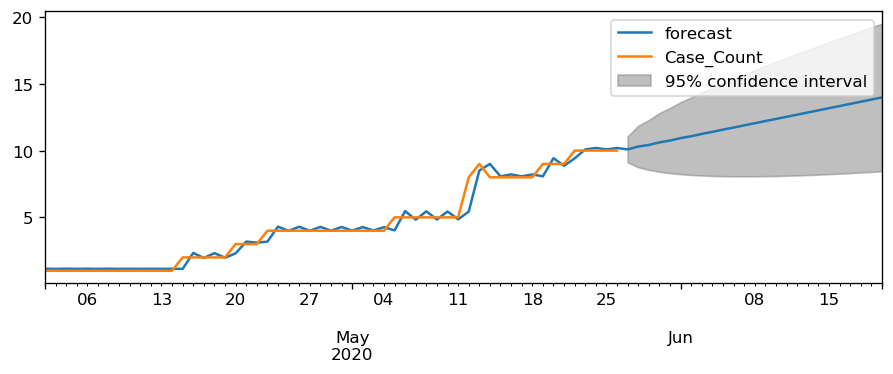

In [50]:
#91901
model_fit.plot_predict(1,80)
plt.show()

In [51]:
#second group 
#group2 91902
df2 = group2[['UpdateDate','Case_Count']]
df2.set_index(['UpdateDate'], inplace = True)
df2.head()


,Case_Count
UpdateDate,
04/01/2020,9.0
04/02/2020,10.0
04/03/2020,10.0
04/04/2020,11.0
03/31/2020,8.0


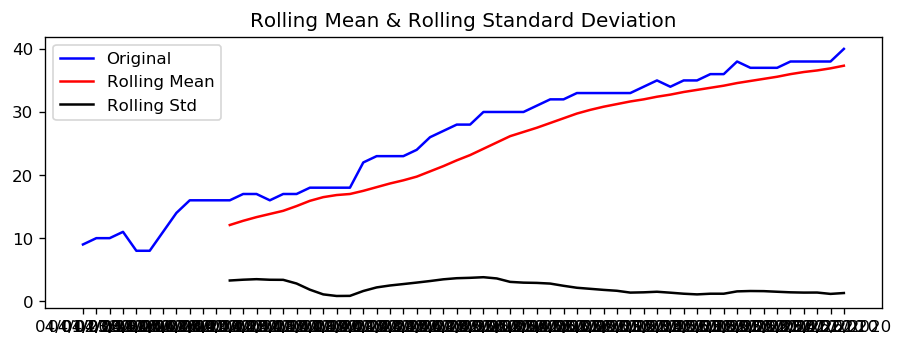

In [52]:
rolling_mean = df2.rolling(window = 12).mean()
rolling_std = df2.rolling(window = 12).std()
plt.plot(df2, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

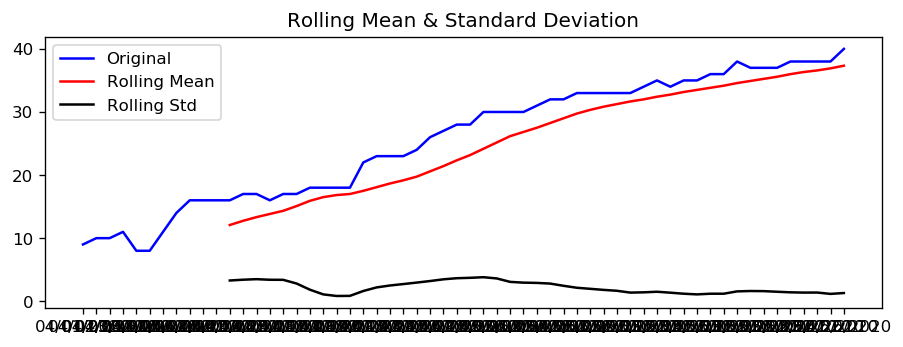

ADF Statistic: -2.0222000791242194
p-value: 0.27692476046742753
Critical Values:
	1%: -3.560242358792829
	5%: -2.9178502070837
	10%: -2.5967964150943397


In [59]:
get_stationarity(df2)


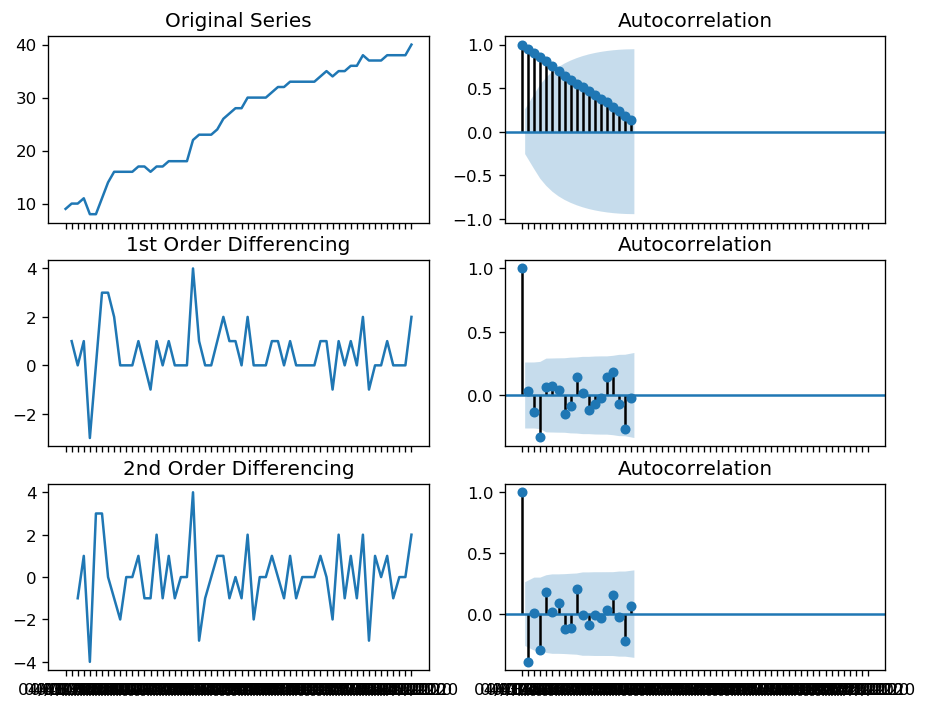

In [60]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df2.Case_Count); axes[0, 0].set_title('Original Series')
plot_acf(df2.Case_Count, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df2.Case_Count.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df2.Case_Count.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df2.Case_Count.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df2.Case_Count.diff().diff().dropna(), ax=axes[2, 1])

plt.show()
#d = 1

In [61]:
from pmdarima.arima.utils import ndiffs
y = df2.Case_Count

# Adf Test
ndiffs(y, test='adf')  # 1

# KPSS test
ndiffs(y, test='kpss')  # 1

# PP test:
ndiffs(y, test='pp')  # 1

1

In [62]:
#!pip install --user pmdarima

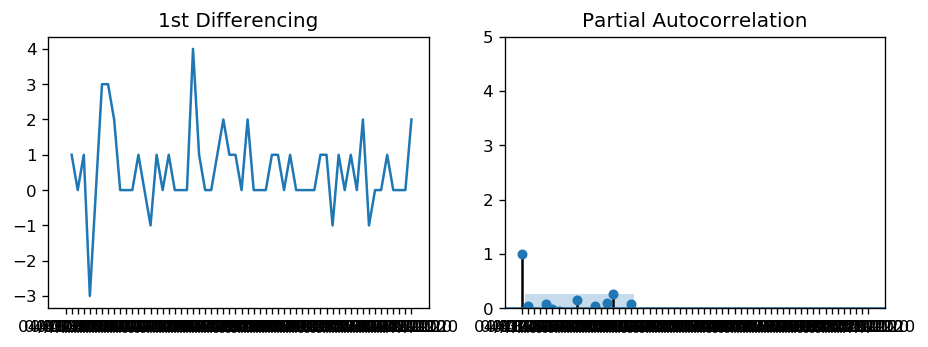

In [63]:
#AR or not
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df2.Case_Count.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df2.Case_Count.diff().dropna(), ax=axes[1])

plt.show()
#p = 1

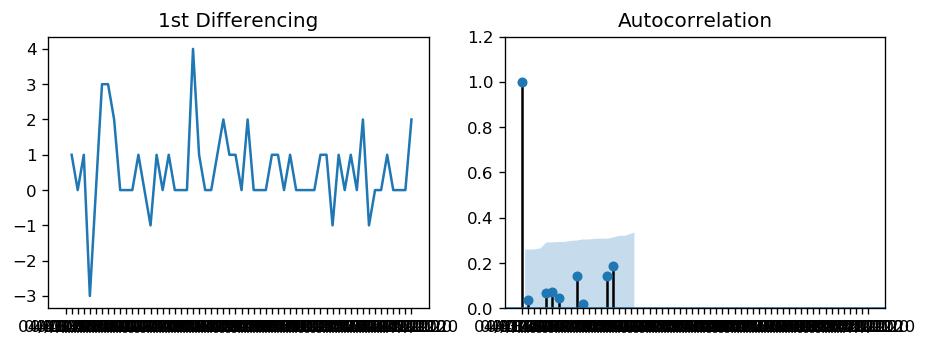

In [64]:
#MA term? 
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/austa.csv')

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df2.Case_Count.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df2.Case_Count.diff().dropna(), ax=axes[1])

plt.show()
#q = 1

In [65]:
#building model
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df2.Case_Count, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' for

                             ARIMA Model Results                              
Dep. Variable:           D.Case_Count   No. Observations:                   57
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -85.120
Method:                       css-mle   S.D. of innovations              1.077
Date:                Thu, 28 May 2020   AIC                            178.241
Time:                        13:04:59   BIC                            186.413
Sample:                             1   HQIC                           181.417
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5439      0.143      3.802      0.000       0.264       0.824
ar.L1.D.Case_Count    -0.9999      0.079    -12.605      0.000      -1.155      -0.844
ma.L1.D.Case_Count  

/home/xij080/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/home/xij080/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/xij080/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/xij080/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


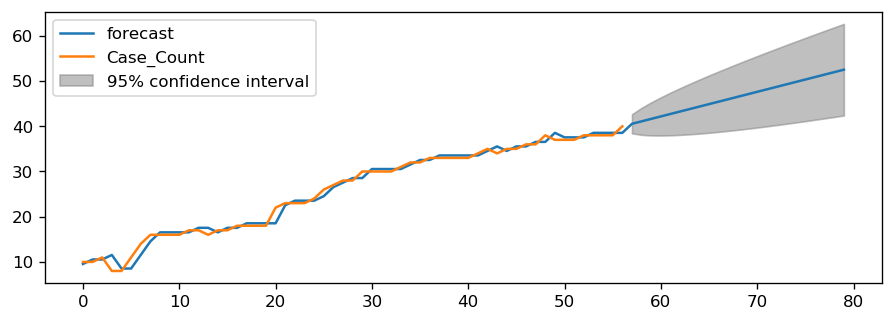

In [66]:
model_fit.plot_predict(1,80)
plt.show()

In [ ]:
# make that prediction on map 

In [67]:
#group 3
#91910
df3 = group3[['UpdateDate','Case_Count']]
df3.set_index(['UpdateDate'], inplace = True)
df3.head()



,Case_Count
UpdateDate,
04/01/2020,23.0
04/02/2020,28.0
04/03/2020,28.0
04/04/2020,30.0
03/31/2020,21.0


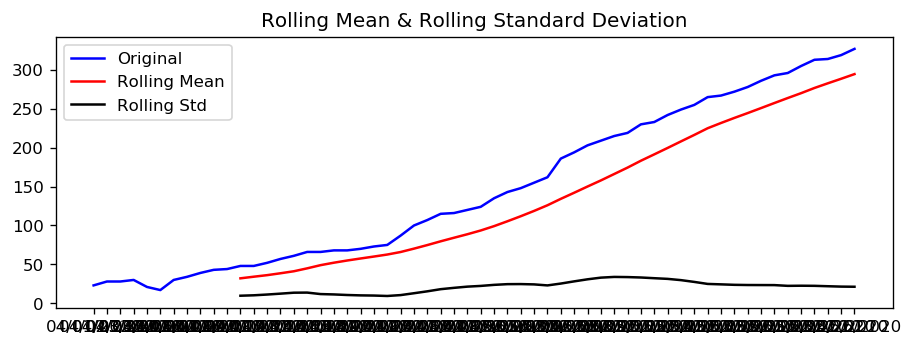

In [68]:
rolling_mean = df3.rolling(window = 12).mean()
rolling_std = df3.rolling(window = 12).std()
plt.plot(df3, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

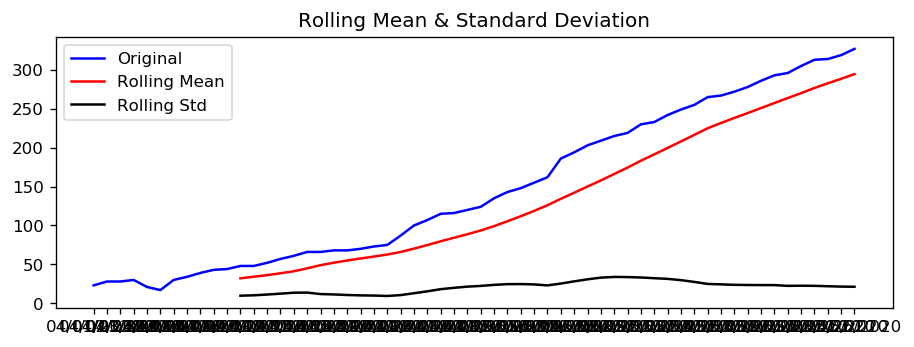

ADF Statistic: 2.323679456775159
p-value: 0.9989697384381516
Critical Values:
	1%: -3.5506699942762414
	5%: -2.913766394626147
	10%: -2.5946240473991997


In [69]:
get_stationarity(df3)

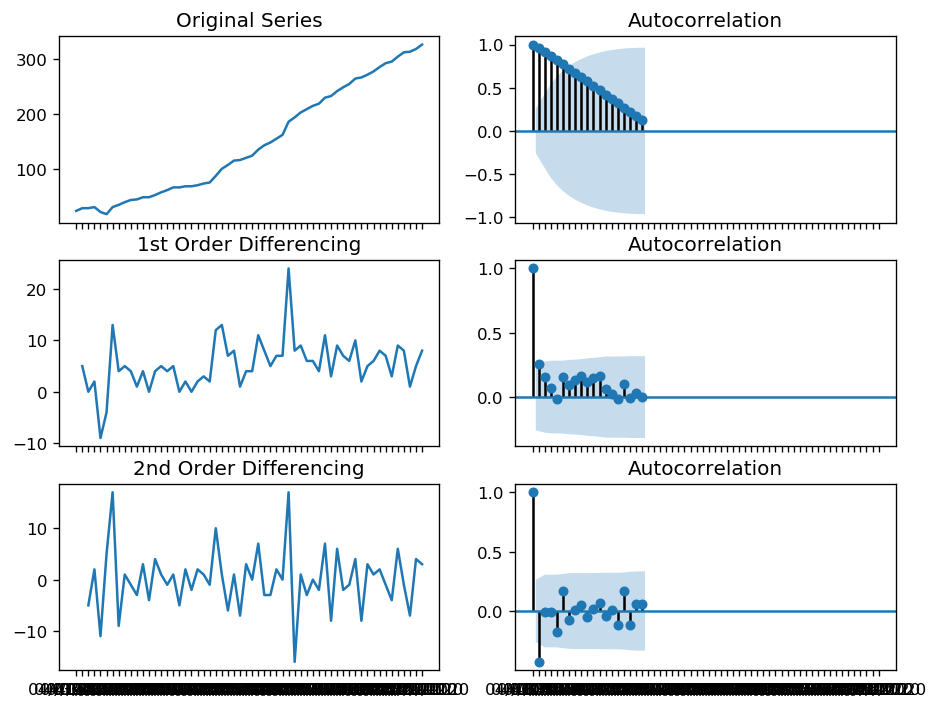

In [70]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df3.Case_Count); axes[0, 0].set_title('Original Series')
plot_acf(df3.Case_Count, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df3.Case_Count.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df3.Case_Count.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df3.Case_Count.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df3.Case_Count.diff().diff().dropna(), ax=axes[2, 1])

plt.show()
#d = 1

In [71]:
from pmdarima.arima.utils import ndiffs
y = df3.Case_Count

# Adf Test
ndiffs(y, test='adf')  # 1

# KPSS test
ndiffs(y, test='kpss')  # 1

# PP test:
ndiffs(y, test='pp')  # 1

1

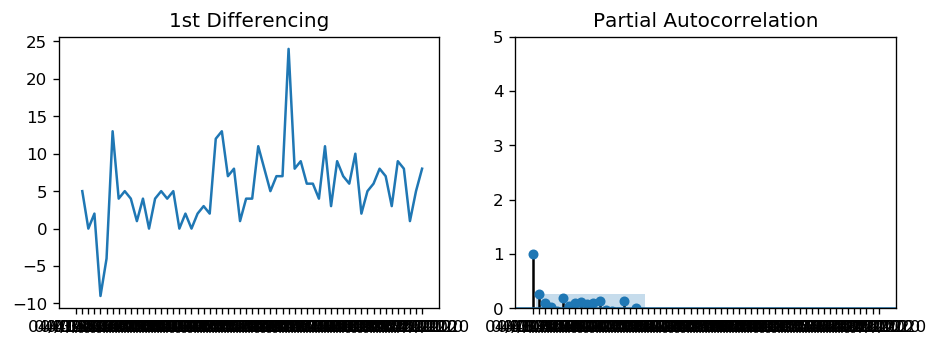

In [72]:
#AR or not
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df3.Case_Count.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df3.Case_Count.diff().dropna(), ax=axes[1])

plt.show()
#p = 1

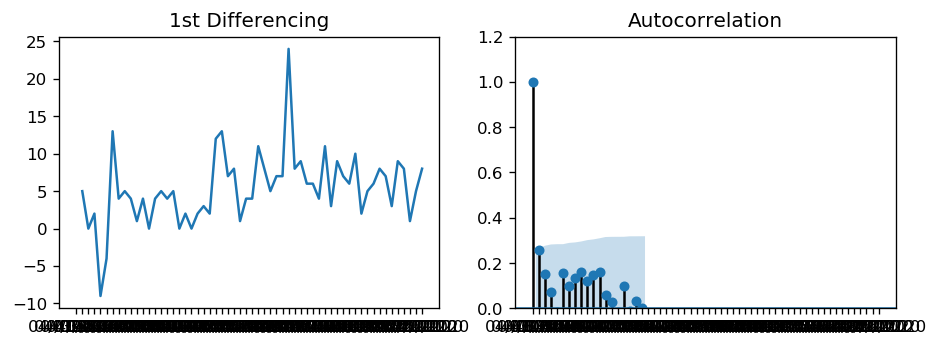

In [73]:
#MA term? 
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/austa.csv')

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df3.Case_Count.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df3.Case_Count.diff().dropna(), ax=axes[1])

plt.show()
#q = 1

In [74]:
#building model
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df3.Case_Count, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Case_Count   No. Observations:                   57
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -166.359
Method:                       css-mle   S.D. of innovations              4.471
Date:                Thu, 28 May 2020   AIC                            340.718
Time:                        13:05:37   BIC                            348.890
Sample:                             1   HQIC                           343.894
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.0278      1.394      3.607      0.000       2.296       7.760
ar.L1.D.Case_Count     0.9216      0.107      8.610      0.000       0.712       1.131
ma.L1.D.Case_Count  

/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' for

/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


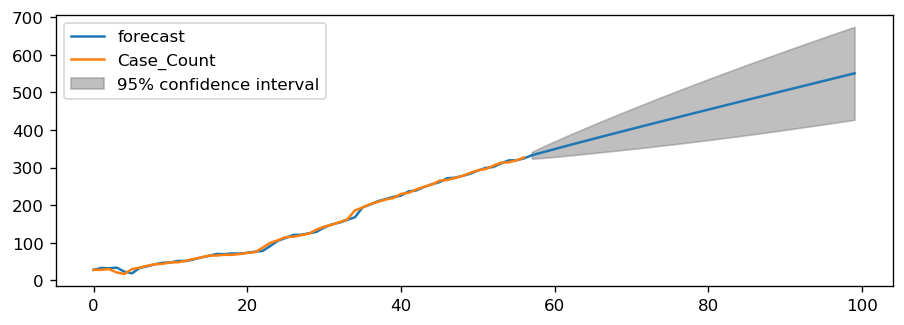

In [75]:
model_fit.plot_predict(1,100)
plt.show()

In [76]:
#group4
df4 = group4.drop(['ZipText'], axis = 1).copy()
# df4.set_index(['UpdateDate'], inplace = True)
# df4.head()
df4.head()

,UpdateDate,Case_Count,Unnamed: 0,HaveInsur,Noinsurance,Laborforce,PubTrans,BusinOccu,ServiceOccu,SalesOccu,ConstructionOcc,TranspOccu,H<10k,H<14k,HwithEarn,HwithSSN,HwithRetire,HwithSupple,HwithAssist
3,04/01/2020,21.0,5,14.0,63.4,5.1,3.5,24.8,22.5,27.3,12.2,13.1,4.6,7.1,79.9,28.8,20.3,6.5,3.2
100,04/02/2020,24.0,5,14.0,63.4,5.1,3.5,24.8,22.5,27.3,12.2,13.1,4.6,7.1,79.9,28.8,20.3,6.5,3.2
198,04/03/2020,26.0,5,14.0,63.4,5.1,3.5,24.8,22.5,27.3,12.2,13.1,4.6,7.1,79.9,28.8,20.3,6.5,3.2
296,04/04/2020,29.0,5,14.0,63.4,5.1,3.5,24.8,22.5,27.3,12.2,13.1,4.6,7.1,79.9,28.8,20.3,6.5,3.2
393,03/31/2020,16.0,5,14.0,63.4,5.1,3.5,24.8,22.5,27.3,12.2,13.1,4.6,7.1,79.9,28.8,20.3,6.5,3.2


In [77]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model1 = ARIMA(df4.Case_Count, order=(1,1,1))
model_fit1 = model1.fit(disp=0)
print(model_fit1.summary())

/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.Case_Count   No. Observations:                   57
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -177.692
Method:                       css-mle   S.D. of innovations              5.461
Date:                Thu, 28 May 2020   AIC                            363.383
Time:                        13:05:53   BIC                            371.555
Sample:                             1   HQIC                           366.559
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.4754      0.688     10.863      0.000       6.127       8.824
ar.L1.D.Case_Count     0.9963      0.017     58.556      0.000       0.963       1.030
ma.L1.D.Case_Count  

/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/xij080/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


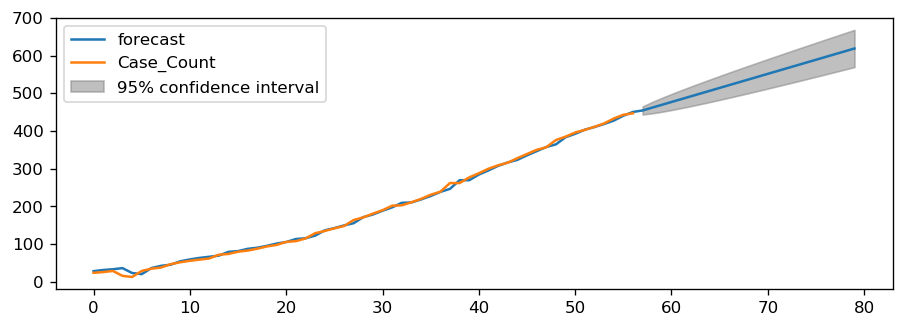

In [79]:
model_fit1.plot_predict(1,80)
plt.show()